End to End Machine Learning project with Toy data / End to End Toy Project       
classification problem : yes/No     
let 100 student data end goal is to create a prediction model, When we provide the new student's CGPA and IQ, will the model indicate whether there will be a placement or not?

steps 

0. preprocesssing + EDA + Feature selections     
    missing value, outliers, unnecessary colum remove prepare the data for gives an algorithm .       
    then EDA-graph plot and take idea for batter preduction,     
    feature selection - Split the columns and take only the important ones, but in this dataset both column is important. 
1. Extrect input and output columns     
    separate the input and output columns.          
2. Scale the value         
    Bring all input column values into one range : -1,1  
3. Train test split 
4. Train the model               
5. Evalute the model/model selection           
6. Deploy the model

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.shape

(100, 4)

The unnamed column is unnecessary, so it needs to be removed during preprocessing; in real-world scenarios, such work is often required.     
no missing value present is there, then Only remove the unnamed column that been preprocess   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


allRows:, column 1 onwoard : and all column    
c=color

In [5]:
df = df.iloc[:, 1:]

EDA

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


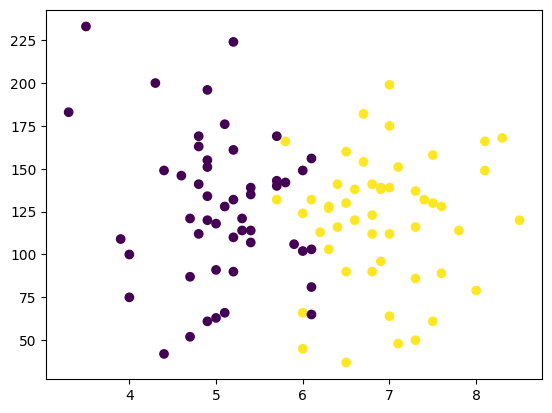

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

Now the task is to create a machine learning model that can understand the hidden patterns in this data.     
The ML model I am going to create is logistic regression.     
logistic regeression is a very famous ML algorithm that classifies the data. ....   

Extrect input and output columns    
cgpa, iq is a independent variable, and placement is dependent variable 

In [9]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [11]:
x.shape

(100, 2)

In [31]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [32]:
y.shape

(100,)

3 - Train test split    
How much % of data will go into training data and how much % of data will go into the test data?     
0.1 : 100 data means 10 rows will go to the test and 90 data will go to training.         

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [35]:
x_train

,cgpa,iq
13,6.4,116.0
69,8.5,120.0
75,4.8,169.0
78,6.1,81.0
86,5.1,128.0
...,...,...
57,6.5,130.0
54,6.4,141.0
85,5.8,166.0
37,8.1,149.0


In [37]:
x_test

,cgpa,iq
30,7.6,128.0
65,8.1,166.0
94,4.7,52.0
32,7.0,139.0
25,5.0,91.0
43,6.8,141.0
89,4.9,151.0
3,7.4,132.0
77,7.3,50.0
17,3.3,183.0


In [39]:
y_train

13    1
69    1
75    0
78    0
86    0
     ..
57    1
54    1
85    1
37    1
44    1
Name: placement, Length: 90, dtype: int64

In [41]:
y_test

30    1
65    1
94    0
32    1
25    0
43    1
89    0
3     1
77    1
17    0
Name: placement, dtype: int64

scale the value between -1,1 It is not always necessary.       

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.39940488, -0.19322175],
       [ 2.33498238, -0.09167455],
       [-1.07532083,  1.15227863],
       [ 0.12289381, -1.08175974],
       [-0.79880976,  0.11141984],
       [-0.0614469 , -0.44708975],
       [-0.79880976,  1.32998622],
       [ 0.03072345, -1.46256173],
       [ 0.49157524,  0.92379743],
       [-0.24578762,  0.41606144],
       [-0.7066394 ,  2.5485526 ],
       [ 0.5837456 , -0.09167455],
       [-0.24578762,  1.15227863],
       [-0.89098012, -1.53872213],
       [ 2.15064167,  1.12689183],
       [ 0.95242702, -0.29476895],
       [ 1.04459738, -1.91952413],
       [ 0.76808631, -0.29476895],
       [ 0.5837456 ,  0.36528784],
       [-0.61446905, -0.24399535],
       [-0.79880976, -1.46256173],
       [-1.81268369, -0.59941055],
       [-1.53617262,  1.93926941],
       [-1.16749119, -0.92943894],
       [ 0.67591595,  1.48230702],
       [-0.7066394 ,  0.21296704],
       [ 0.49157524, -0.85327854],
       [ 0.95242702,  1.30459942],
       [ 1.2289381 ,

In [47]:
x_test = scaler.transform(x_test)
x_test

array([[  7.6, 128. ],
       [  8.1, 166. ],
       [  4.7,  52. ],
       [  7. , 139. ],
       [  5. ,  91. ],
       [  6.8, 141. ],
       [  4.9, 151. ],
       [  7.4, 132. ],
       [  7.3,  50. ],
       [  3.3, 183. ]])

Train the model : decide the logistic regession classifiers.

In [48]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()

This is model tranning

In [50]:
clf.fit(x_train, y_train)

LogisticRegression()

Evalute the model : evaluate the model, find the accurecy on the test data   

In [53]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [56]:
y_test

30    1
65    1
94    0
32    1
25    0
43    1
89    0
3     1
77    1
17    0
Name: placement, dtype: int64

Checked accuracy : accuracy is 70 % 

In [61]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.7

how to plot the dicision boundary,   
The ML model has noticed what pattern in your data, If you want to visualize it, you can use decision boundaries to visualize.           

!pip install mlxtend                
This is the decision boundary.             

<Axes: >

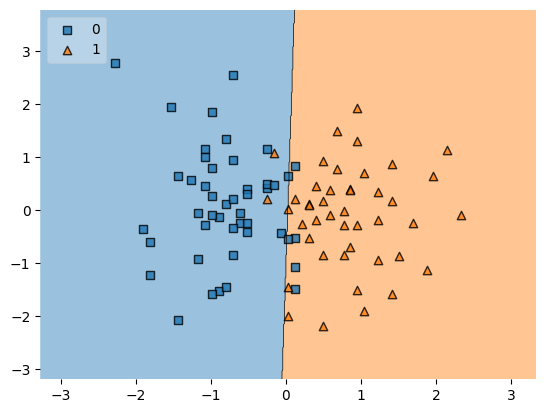

In [66]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

Pickle converts any object into a file, and we can use that file in any other environment.         
You can lift the (model.pkl) file and deploy it on your website.           

In [68]:
import pickle 
pickle.dump(clf, open('model.pkl', 'wb'))